In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class IO_CSCAN:
    
    def __init__(self, array, pivot, direction):
        self.origSeq = array
        array.extend([0, 199])
        greaterArr = [x for x in array if x >= pivot]
        lesserArr = [x for x in array if x < pivot]
        if direction == "R" or direction == "r":
            greaterArr.sort()
            lesserArr.sort()
            self.reqSeq = greaterArr + lesserArr
            
        if direction == "L" or direction == "l":
            greaterArr.sort(reverse=True)
            lesserArr.sort(reverse=True)
            self.reqSeq = lesserArr + greaterArr
            
        
        self.head = pivot
        self.totalSeek = 0
        self.direction = direction
        
    def calculateSeekOperations(self):
        
        head = self.head
        sum = 0

        print(self.reqSeq)
        for x in range(len(self.reqSeq)):
            if x > 0:
                print(" + ", end="")
            sum += max(head, self.reqSeq[x]) - min(head, self.reqSeq[x])
            print( "(", max(head, self.reqSeq[x]), " - ", min(head, self.reqSeq[x]), sep="", end=")")
            head = self.reqSeq[x]
            
        self.totalSeek = sum
        print("\nTotal Seek Count: ", self.totalSeek)
        return sum

    def display(self):
        seq = self.reqSeq
        seq.insert(0, self.head)
        plt.figure(figsize=(10, 5))
        plt.plot(seq, range(len(seq)), marker=".", label="Seek Sequence", color="green")
        
        for i in range(len(seq) - 1):
            plt.annotate('', xy=(seq[i+1], i+1), xytext=(seq[i], i),
                 arrowprops=dict(arrowstyle='->', color='green'))

        plt.title(f"Disk Scheduling - C-Scan ({self.direction})")
        plt.xlabel("Sequence Order")
        plt.ylabel("Track Number")
        plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
        plt.gca().xaxis.tick_top()  # Move x-axis ticks to the top
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.legend()
        plt.ioff()
        plt.gcf().savefig(fname=f"Plot Figures/IO-CSCAN({self.direction})", bbox_inches="tight", pad_inches=0.3,transparent=False)
        plt.show()
        plt.close()

Enter Request Array =  176 79 34 60 92 11 41 114
Input Head Sequence =  50
Direction(L/R) =  R


[60, 79, 92, 114, 176, 199, 0, 11, 34, 41]
(60 - 50) + (79 - 60) + (92 - 79) + (114 - 92) + (176 - 114) + (199 - 176) + (199 - 0) + (11 - 0) + (34 - 11) + (41 - 34)
Total Seek Count:  389


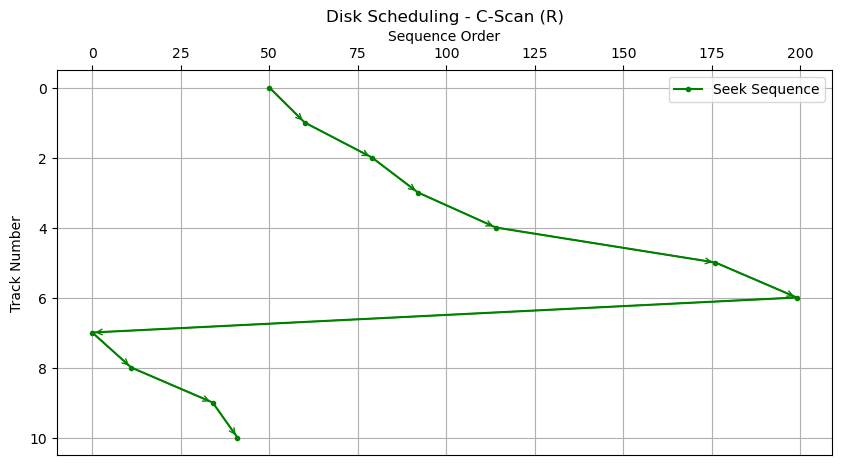

Enter Request Array =  176 79 34 60 92 11 41 114
Input Head Sequence =  50
Direction(L/R) =  L


[41, 34, 11, 0, 199, 176, 114, 92, 79, 60]
(50 - 41) + (41 - 34) + (34 - 11) + (11 - 0) + (199 - 0) + (199 - 176) + (176 - 114) + (114 - 92) + (92 - 79) + (79 - 60)
Total Seek Count:  388


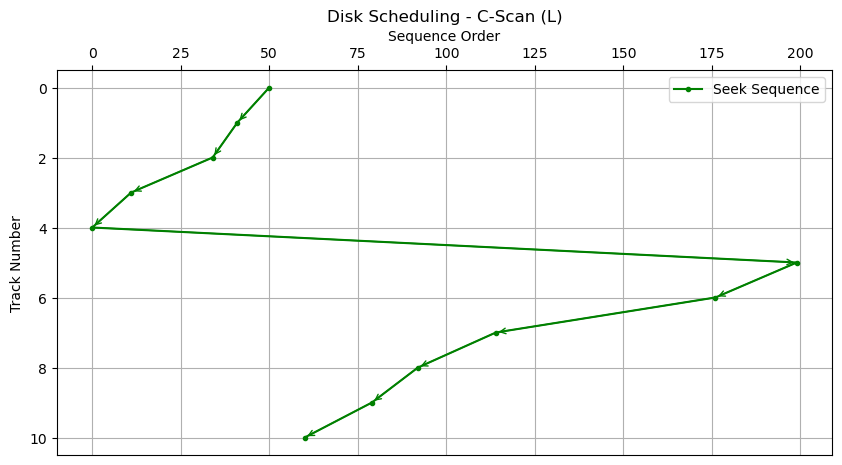

In [4]:
def simulation():
    while True:
        try:
            reqArr = list(map(int, input("Enter Request Array = ").split()))
            break
        except ValueError:
            print("PLEASE INPUT INTEGER VALUES!")
    while True:
        try:
            headSeq = int(input("Input Head Sequence = "))
            break
        except ValueError:
            print("PLEASE INPUT INTEGER VALUE!")
    while True:
        try:
            direction = input("Direction(L/R) = ")
            if direction == "L" or direction == "R":
                break
            else:
                print("INPUT L OR R!!")
        except ValueError:
            print("PLEASE INPUT CORRECT VALUE!")

    simulator = IO_CSCAN(reqArr, headSeq, direction)
    simulator.calculateSeekOperations()
    simulator.display()
        
simulation()
simulation()
